In [2]:

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and
##### make a table containing R^2 value for each prepared model.

##### R&D Spend -- Research and devolop spend in the past few years
##### Administration -- spend on administration in the past few years
##### Marketing Spend -- spend on Marketing in the past few years
##### State -- states from which data is collected
##### Profit  -- profit of each state in the past few years


In [3]:
data=pd.read_csv("50_Startups.csv")

In [4]:
data

,R&DSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data.shape

(50, 5)

In [6]:
data.describe()

,R&DSpend,Administration,MarketingSpend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&DSpend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   MarketingSpend  50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### From the above we get to know that, There are no Null Values in the Data set by reading Counts and non-null counts. and all the data types are correct .
State is a Categorical feature we need to do some encoding or convert it into numerical values by putting dummy values

In [8]:
df=data.rename({"R&DSpend":'RnD',"Administration":'Admin',"MarketingSpend":'market',"State":'state',"Profit":'profit'},axis=1)
df

,RnD,Admin,market,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [9]:
#Check duplicate values in dataset
df[df.duplicated()].sum()

RnD       0.0
Admin     0.0
market    0.0
state     0.0
profit    0.0
dtype: float64

No duplicate values in data 

## Visualizing Continuous Datatype for Outlier Detection


In [10]:
continuous_features=[feature for feature in df.columns if df[feature].dtype!='O']
print("Continuous features Count : ", len(continuous_features))


Continuous features Count :  4


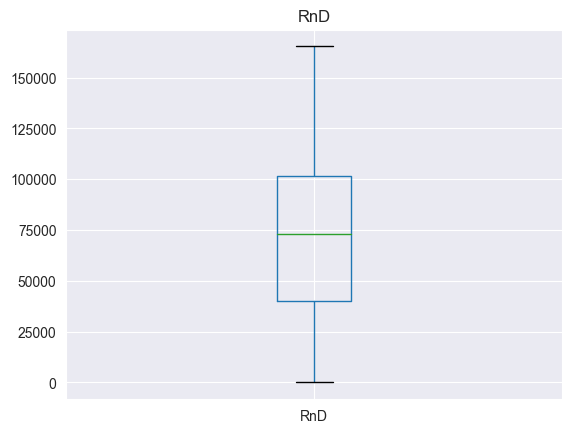

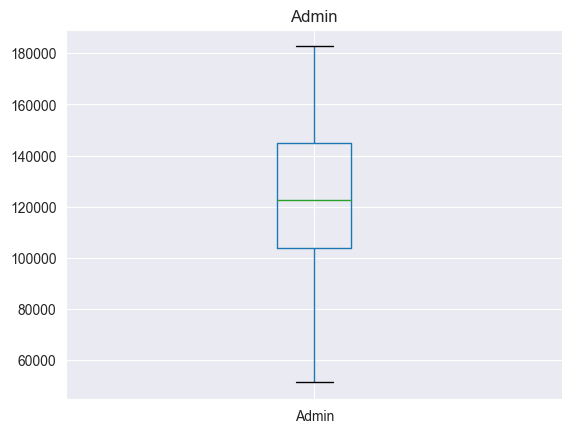

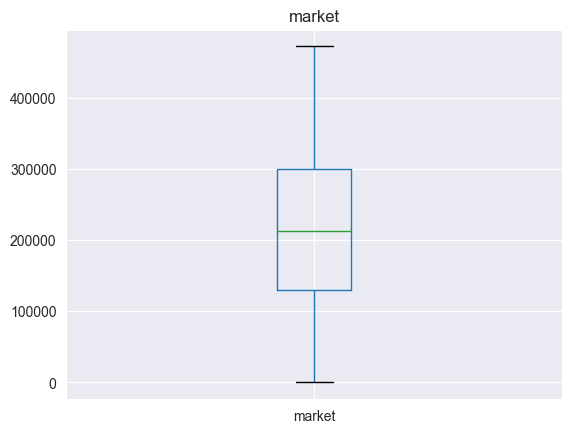

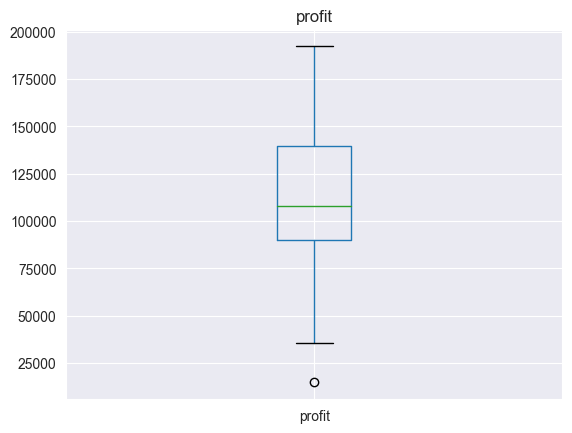

In [13]:
#Box-Plot
for feature in continuous_features:
    data=df.copy()  
    data.boxplot(column=feature)
    plt.title(feature)
    plt.show()


### we can see that there is one outlier in profit data

In [14]:
# To handle outlier
Q1 = np.quantile(df.profit,0.25)
Q3 = np.quantile(df.profit,0.75)
med = np.median(df.profit)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n'
      'Second Quantile=', med,'\n' 
      'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n'
      'Upper Whisker=', upper_bound,'\n' 
      'Lower Whisker=', lower_bound)


First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [15]:
#To find the place of outlier
Outliers = df.profit[(df.profit <= lower_bound) | (df.profit >= upper_bound)]
print('The outlier in the boxplot at:',Outliers)


The outlier in the boxplot at: 49    14681.4
Name: profit, dtype: float64


In [16]:
display(df[df.index.isin([49])],df.head())


,RnD,Admin,market,state,profit
49,0.0,116983.8,45173.06,California,14681.4


,RnD,Admin,market,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x19206c5bbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x19206c6b130>,
 'boxes': [<matplotlib.lines.Line2D at 0x19206c5b910>],
 'medians': [<matplotlib.lines.Line2D at 0x19206c6b670>],
 'fliers': [<matplotlib.lines.Line2D at 0x19206c6b910>],
 'means': []}

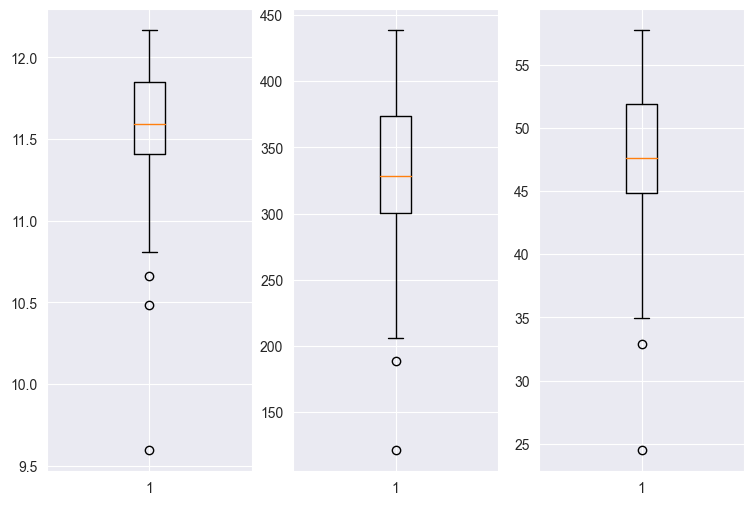

In [17]:
plt.subplots(figsize = (9,6))
plt.subplot(131)
plt.boxplot(np.log(df['profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(df['profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(df['profit']))

Even After Transformation we cannot get rid of the outlier

In [18]:
#Calculate R-Square to check the model
r_model = smf.ols("profit~RnD+Admin+market", data = df).fit()
r_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           4.53e-30
Time:                        23:43:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
Admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
market         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We try to handle outlier by median impuation technique

In [19]:
df.profit.median()

107978.19

Text(0.5, 1.0, 'Before Median Imputation')

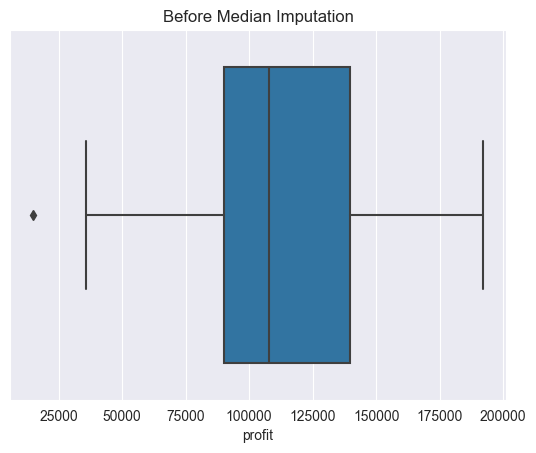

In [20]:
df1=df.copy()
sn.boxplot(df['profit'])
plt.title("Before Median Imputation")

In [21]:
after_median_imputation= np.median(df1['profit'])

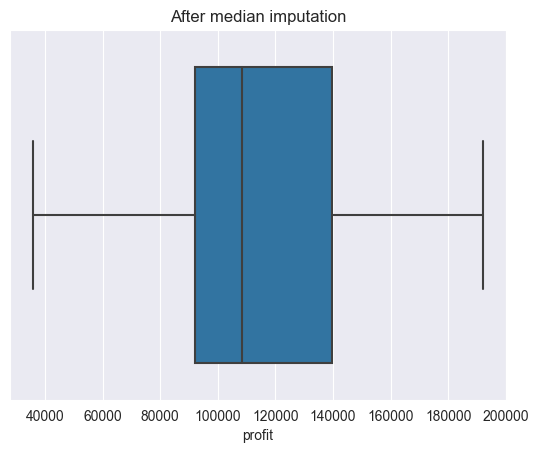

In [22]:
for i in df1['profit']:
    q1 = np.quantile(df.profit,0.25)
    q3 = np.quantile(df.profit,0.75)
    med = np.median(df.profit)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        df1['profit'] = df1['profit'].replace(i, np.median(df1['profit']))
sn.boxplot(df1['profit'])
plt.title('After median imputation')
plt.show()


### As we can see after median imputation the model is performing well.
### The best thing we can do is now to remove the outlier and see the results

In [23]:
df2=df.drop(49)

In [24]:
df2

,RnD,Admin,market,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Text(0.5, 1.0, 'Profit after removing outliers')

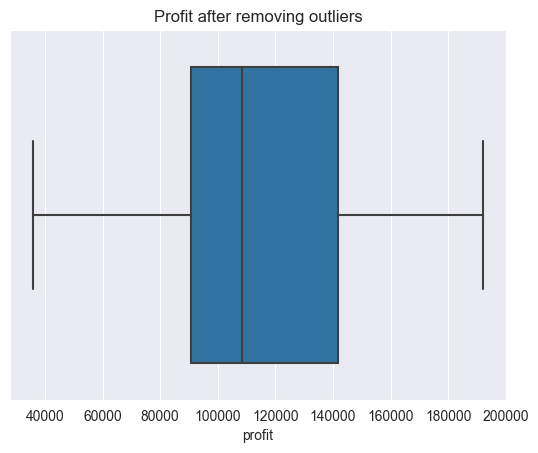

In [25]:
sn.boxplot(df2.profit)
plt.title('Profit after removing outliers')


In [26]:
after_outlier=smf.ols("profit~RnD+Admin+market", data = df2).fit()
# Finding rsquared values
after_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           8.85e-32
Time:                        23:43:12   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD            0.7830      0.038     20.470      0.000       0.706       0.860
Admin         -0.0222      0.043     -0.518      0.607      -0.109       0.064
market         0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we see ,after imputing outlier there is slightly diff on model

# EDA
### Visualizing the Distribution of Independent Features with the help of Histograms


In [27]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    st.probplot(data[feature],dist='norm',plot=pylab)


Text(0.5, 1.0, 'Profit')

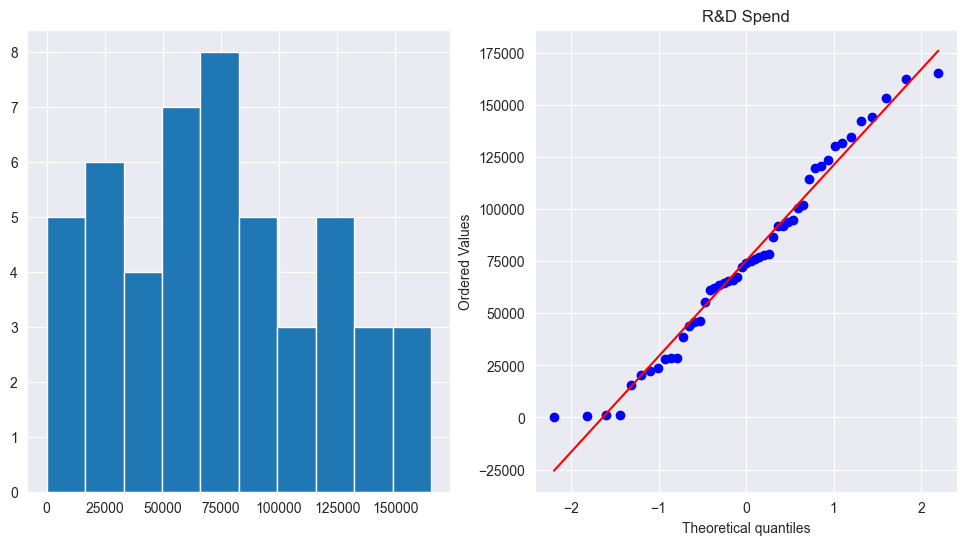

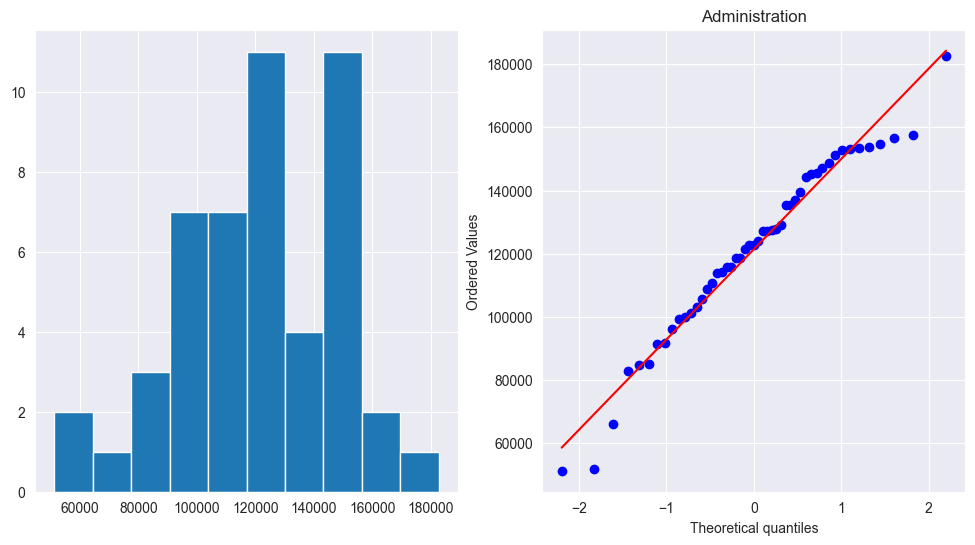

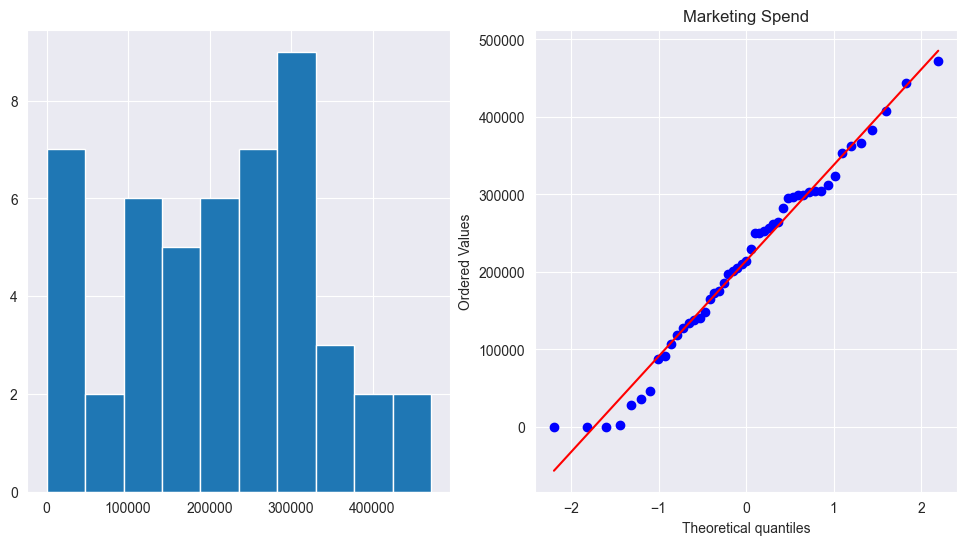

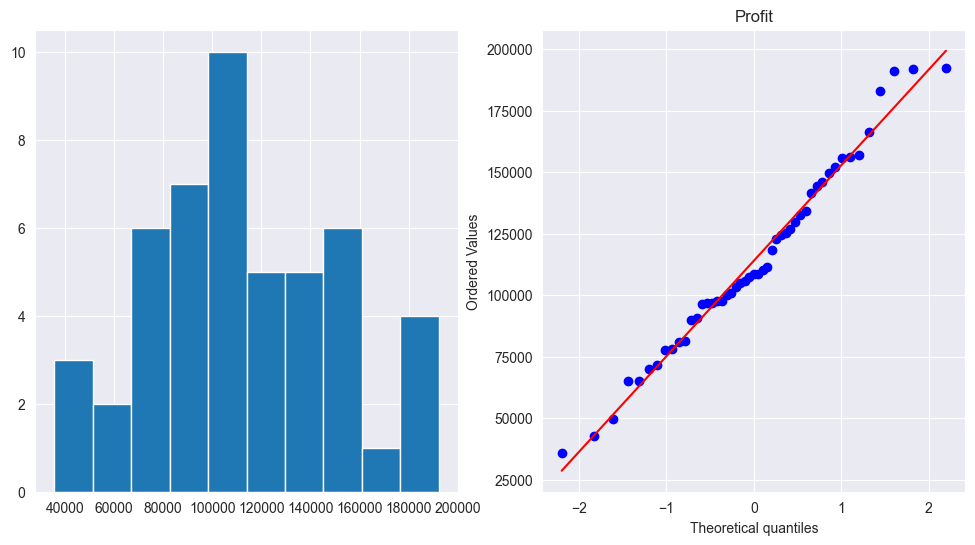

In [28]:
plot_data(df2,'RnD')
plt.title('R&D Spend')
plot_data(df2,'Admin')
plt.title('Administration')
plot_data(df2,'market')
plt.title('Marketing Spend')
plot_data(df2,'profit')
plt.title('Profit')

<AxesSubplot: ylabel='state'>

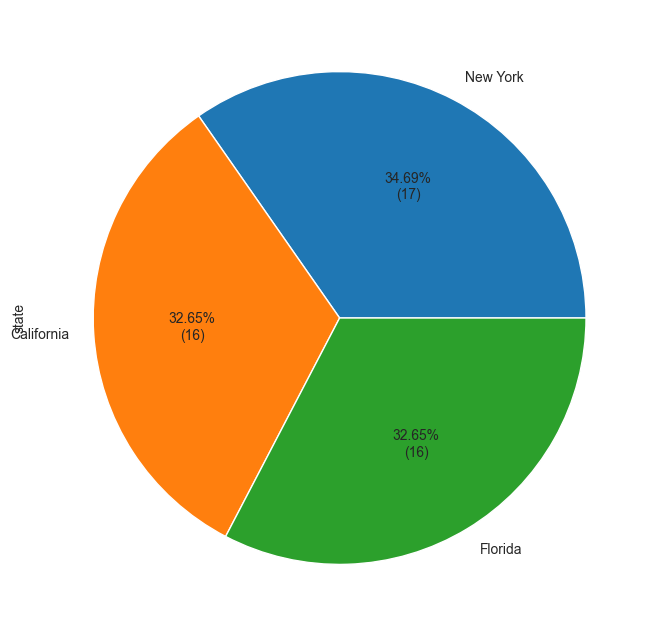

In [29]:
plt.figure(figsize=(8,8))
df2['state'].value_counts().plot(kind='pie',autopct=lambda p:'{:.2f}%\n({:.0f})'.format(p,(p/100)*(df2['state'].value_counts().sum())))


In [30]:
df.state.value_counts().sum()

50

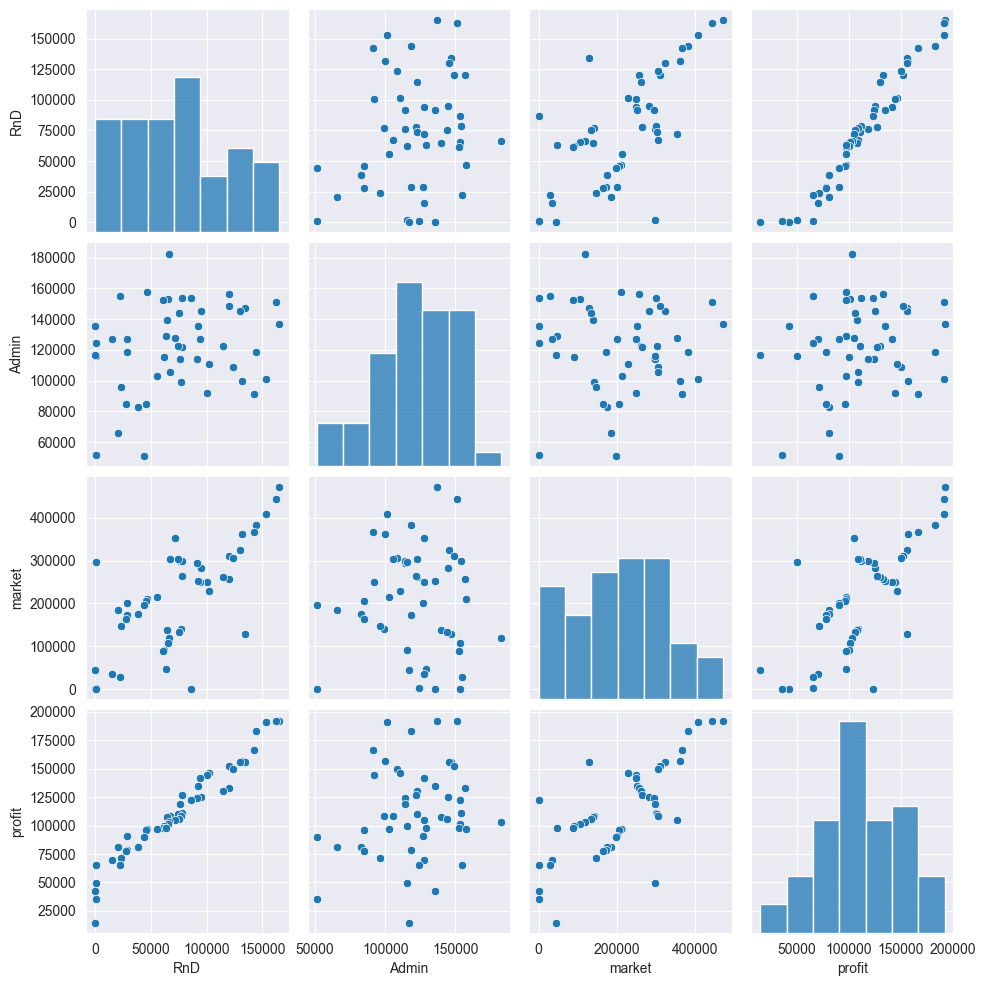

In [31]:
sn.pairplot(data)

### From the above pairplot we see that only RnD feature has good linear elation with  profir as compare to other features

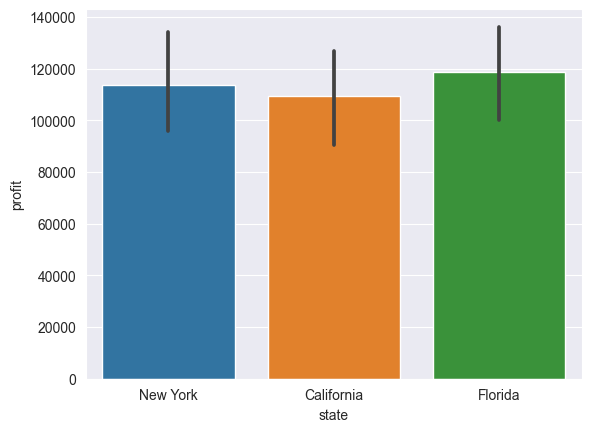

In [32]:
ax=sn.barplot(x="state",y="profit",data=df2)


### There is not much of difference between how much profit each state generates from each other and there is not any direct relation.
 We are going to drop this feature while building model because it is an irrelevant feature for our inferences

In [33]:
df3=df1.drop('state',axis=1)
df3.head()

,RnD,Admin,market,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Checking for correlarion between fetures and Target

In [34]:
df3.corr()

,RnD,Admin,market,profit
RnD,1.000000,0.241955,0.724248,0.956777
Admin,0.241955,1.000000,-0.032154,0.206243
market,0.724248,-0.032154,1.000000,0.729236
profit,0.956777,0.206243,0.729236,1.000000


<AxesSubplot: >

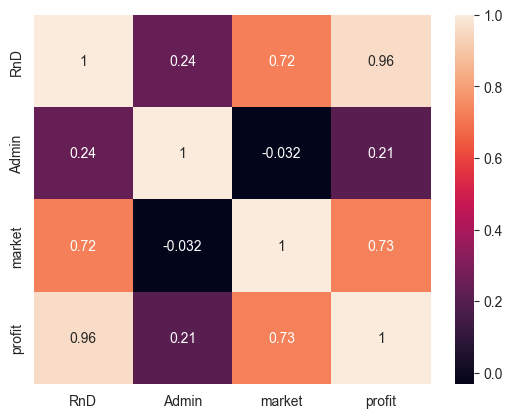

In [35]:
sn.heatmap(df3.corr(),annot=True)

# Feature Engineering
#### Applying some Data Transformation to increase the linear realtionship and improve our model prediction as well it scores
### Applying Standard Scaler

In [36]:
from sklearn.preprocessing import StandardScaler

df_standard = df3.copy()
features = df_standard[continuous_features]
scaler = StandardScaler()

df_standard[continuous_features] = scaler.fit_transform(features.values)
df_standard.head()

,RnD,Admin,market,profit
0,2.016411,0.560753,2.153943,2.095275
1,1.955860,1.082807,1.923600,2.082718
2,1.754364,-0.728257,1.626528,2.062892
3,1.554784,-0.096365,1.422210,1.845076
4,1.504937,-1.079919,1.281528,1.398290


#### Now if we check the mean and standard deviation of our scaled data it should have a Mean '0' and Standard deviation '1'


In [37]:
#To check descriptive analysis
df_standard.describe()

,RnD,Admin,market,profit
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,1.199041e-16,-2.919887e-16,-9.325873e-17,-4.346523e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.622362e+00,-2.525994e+00,-1.743127e+00,-2.090515e+00
25%,-7.434983e-01,-6.350458e-01,-6.750713e-01,-5.808027e-01
50%,-1.475621e-02,4.885871e-02,1.396931e-02,-1.500543e-01
75%,6.135700e-01,8.471792e-01,7.305723e-01,6.920002e-01
max,2.016411e+00,2.210141e+00,2.153943e+00,2.095275e+00


In [38]:
print('Mean' '\n',np.round(df_standard.mean(),1),'\n' 'Standard Deviation','\n',np.round(df_standard.std()),1)


Mean
 RnD       0.0
Admin    -0.0
market   -0.0
profit   -0.0
dtype: float64 
Standard Deviation 
 RnD       1.0
Admin     1.0
market    1.0
profit    1.0
dtype: float64 1


### For building Multi Linear Resgression there are assumption regarding the data set.
#### They are as follows:-
 
1)Feature should be independent of each other there should'nt be any dependency upon each other

2)There shouldn't be any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient)

3)Each Feature and Model Error (residuals) should be independent of each other

4)Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
 
5)There should be a linear relation between the dependent variable and Independent variables

In [39]:
# Preparing a Model

model = smf.ols("profit~RnD+Admin+market", data = df_standard).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           5.06e-25
Time:                        23:43:25   Log-Likelihood:                -8.3307
No. Observations:                  50   AIC:                             24.66
Df Residuals:                      46   BIC:                             32.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-16      0.042  -8.64e-15      1.000      -0.085       0.085
RnD            0.9077      0.066     13.707      0.000       0.774       1.041
Admin         -0.0111      0.046     -0.242      0.810      -0.103       0.081
market         0.0715      0.064      1.112      0.272      -0.058       0.201
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing
### As ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)
### Finding Coefficient Parameters (Beta0 and Beta1's values)


In [40]:
# Finding Coefficient parameters
model.params

Intercept   -3.642919e-16
RnD          9.076733e-01
Admin       -1.107482e-02
market       7.149879e-02
dtype: float64

Assupmtion for multi linear Regression fails

Feature should be independent of each other there should'nt be any dependency upon each other

#### Here, (Intercept) Beta0 p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

##### Observation: 
Since the p-value is not less than .05 for Administration and Marketing features, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data providing those features have any dependency towards the dependent variable

### We do Simple Linear Regression

In [41]:
admin_model = smf.ols("profit~Admin", data = df_standard).fit()
admin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.132
Date:                Sat, 05 Nov 2022   Prob (F-statistic):              0.151
Time:                        23:43:26   Log-Likelihood:                -69.860
No. Observations:                  50   AIC:                             143.7
Df Residuals:                      48   BIC:                             147.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.504e-16      0.141  -2.48e-15      1.000      -0.284       0.284
Admin          0.2062      0.141      1.460      0.151      -0.078       0.490
==============================================================================
Omnibus:                        1.055   Durbin-Watson:                   0.128
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                1.053
Skew:                           0.321   Prob(JB):                        0.591
Kurtosis:                       2.695   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
market_model = smf.ols("profit~market", data = df_standard).fit()
market_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     54.52
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.90e-09
Time:                        23:43:26   Log-Likelihood:                -51.976
No. Observations:                  50   AIC:                             108.0
Df Residuals:                      48   BIC:                             111.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.504e-16      0.099  -3.55e-15      1.000      -0.199       0.199
market         0.7292      0.099      7.384      0.000       0.531       0.928
==============================================================================
Omnibus:                        3.885   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                3.121
Skew:                          -0.325   Prob(JB):                        0.210
Kurtosis:                       4.037   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# So if we combine Admin and market feature to predict profit we should get a total R-sqaure value of 58% right?
admin_n_marketing= smf.ols('profit~Admin+market', data =df_standard).fit()
admin_n_marketing.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     33.07
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.08e-09
Time:                        23:43:26   Log-Likelihood:                -48.984
No. Observations:                  50   AIC:                             104.0
Df Residuals:                      47   BIC:                             109.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.504e-16      0.094  -3.73e-15      1.000      -0.189       0.189
Admin          0.2299      0.094      2.444      0.018       0.041       0.419
market         0.7366      0.094      7.831      0.000       0.547       0.926
==============================================================================
Omnibus:                        5.671   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.425
Skew:                          -0.436   Prob(JB):                       0.0664
Kurtosis:                       4.357   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Try a Test by Calculating VIF ( Variance Inflation Factor )
This helps to check the dependency among the features by building a model without the target and testing various combination among the features

In [44]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df_standard[['market','Admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])


,Features,VIF
1,Admin,1.175091
0,market,2.326773
2,RnD,2.468903


None of the variables has VIF>20, No Collinearity, but we cannot consider all varaibles in Regression equation
### Observation:
As we can observe this test is not giving us much of an information to come up to an conclusion
#### Let's try another approach that will justify our first test we conducted

In [45]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df3[['market','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])


,Features,VIF
0,market,7.156216
1,RnD,7.156216


### Some of the variables has VIF>5, Yes there is Collinearity, hence we cannot consider all varaibles in Regression equation
As we can observe this test is not giving us much of an information to come up to an conclusion


In [46]:
#build two model in each model one of the feature will not be present and then we will come to an conclusion to remove which of the feature by comparing the model parameters
admin_p_model= smf.ols('profit~RnD+Admin', data= df2).fit()
admin_p_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.69e-32
Time:                        23:43:27   Log-Likelihood:                -508.03
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      46   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.682e+04   5105.017     11.131      0.000    4.65e+04    6.71e+04
RnD            0.8349      0.026     31.847      0.000       0.782       0.888
Admin         -0.0464      0.042     -1.110      0.273      -0.131       0.038
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                     6.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


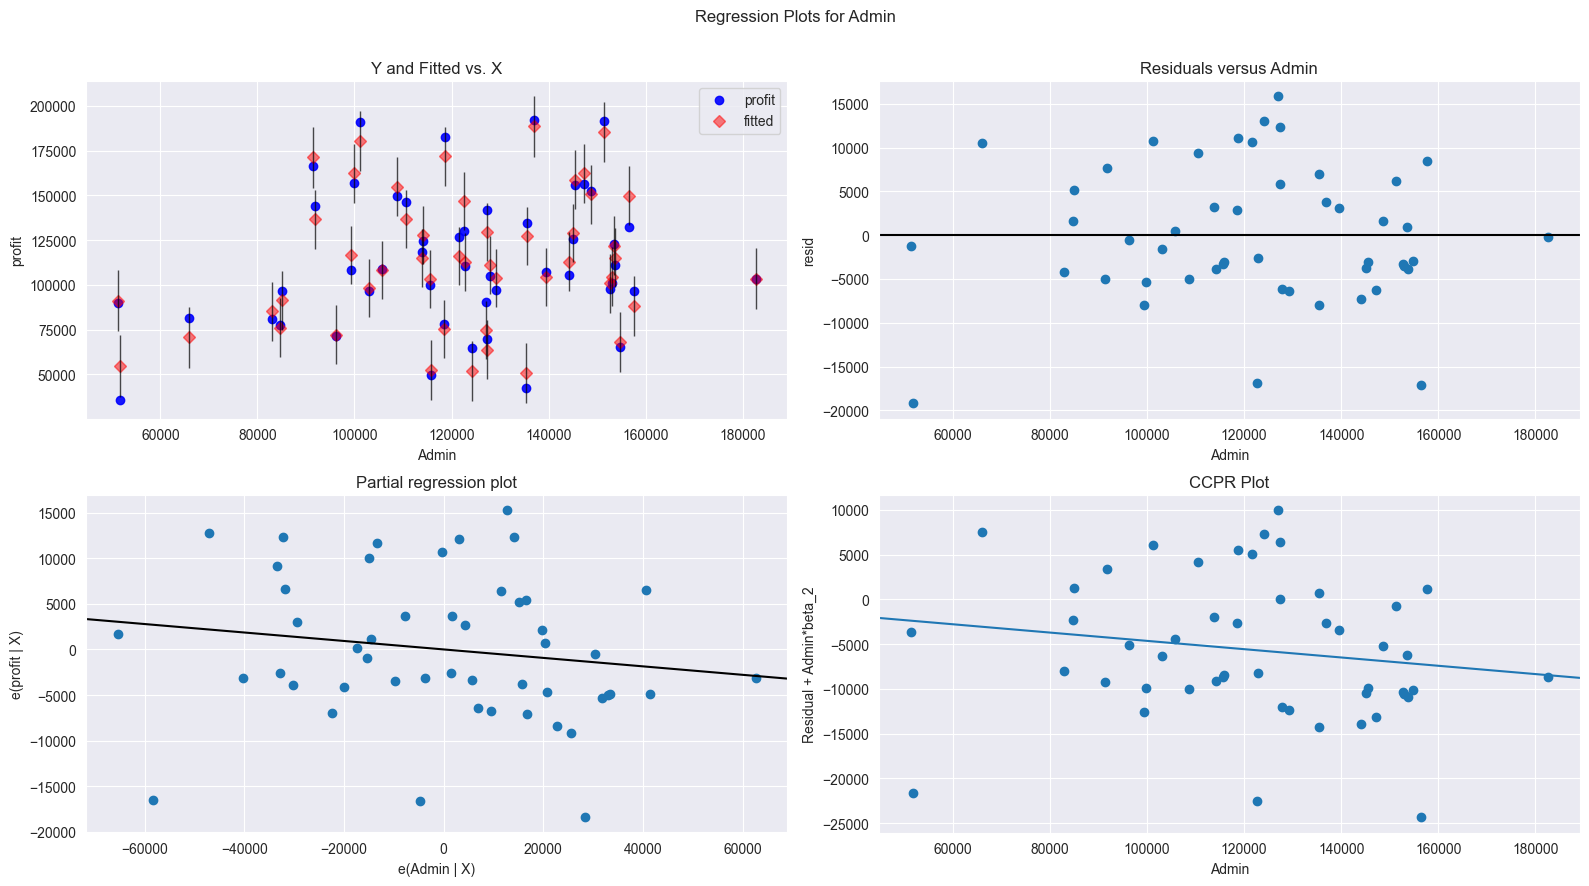

In [47]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(admin_p_model, 'Admin', fig=fig)
plt.show()


eval_env: 1


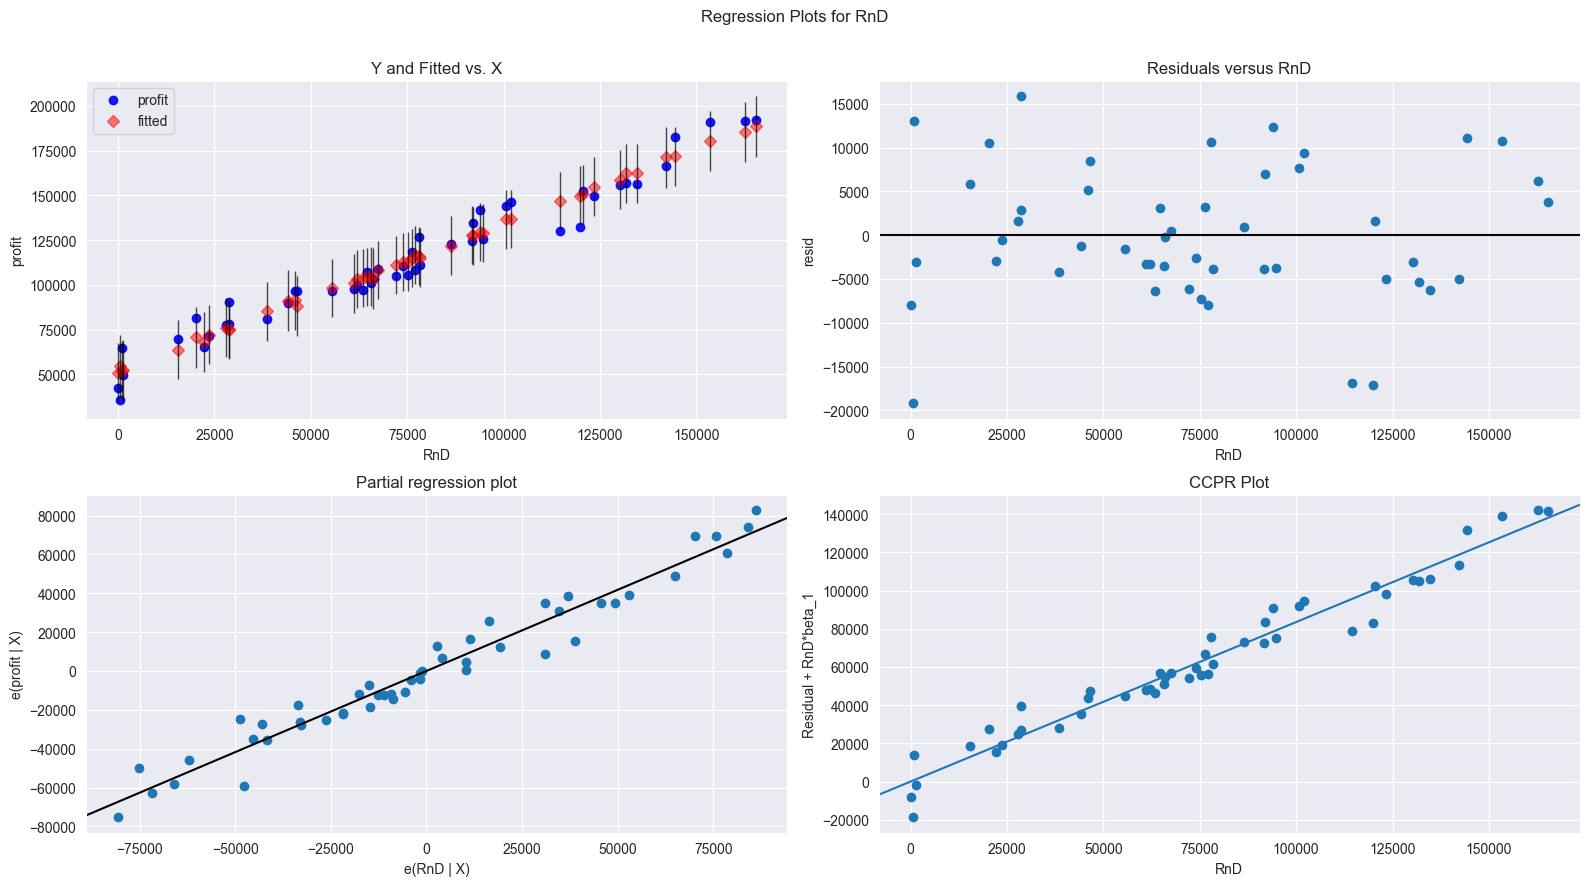

In [48]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(admin_p_model, 'RnD', fig=fig)
plt.show()


In [49]:
marketing_p_model= smf.ols('profit~RnD+market', data= df2).fit()
marketing_p_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           3.74e-33
Time:                        23:43:32   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
market         0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


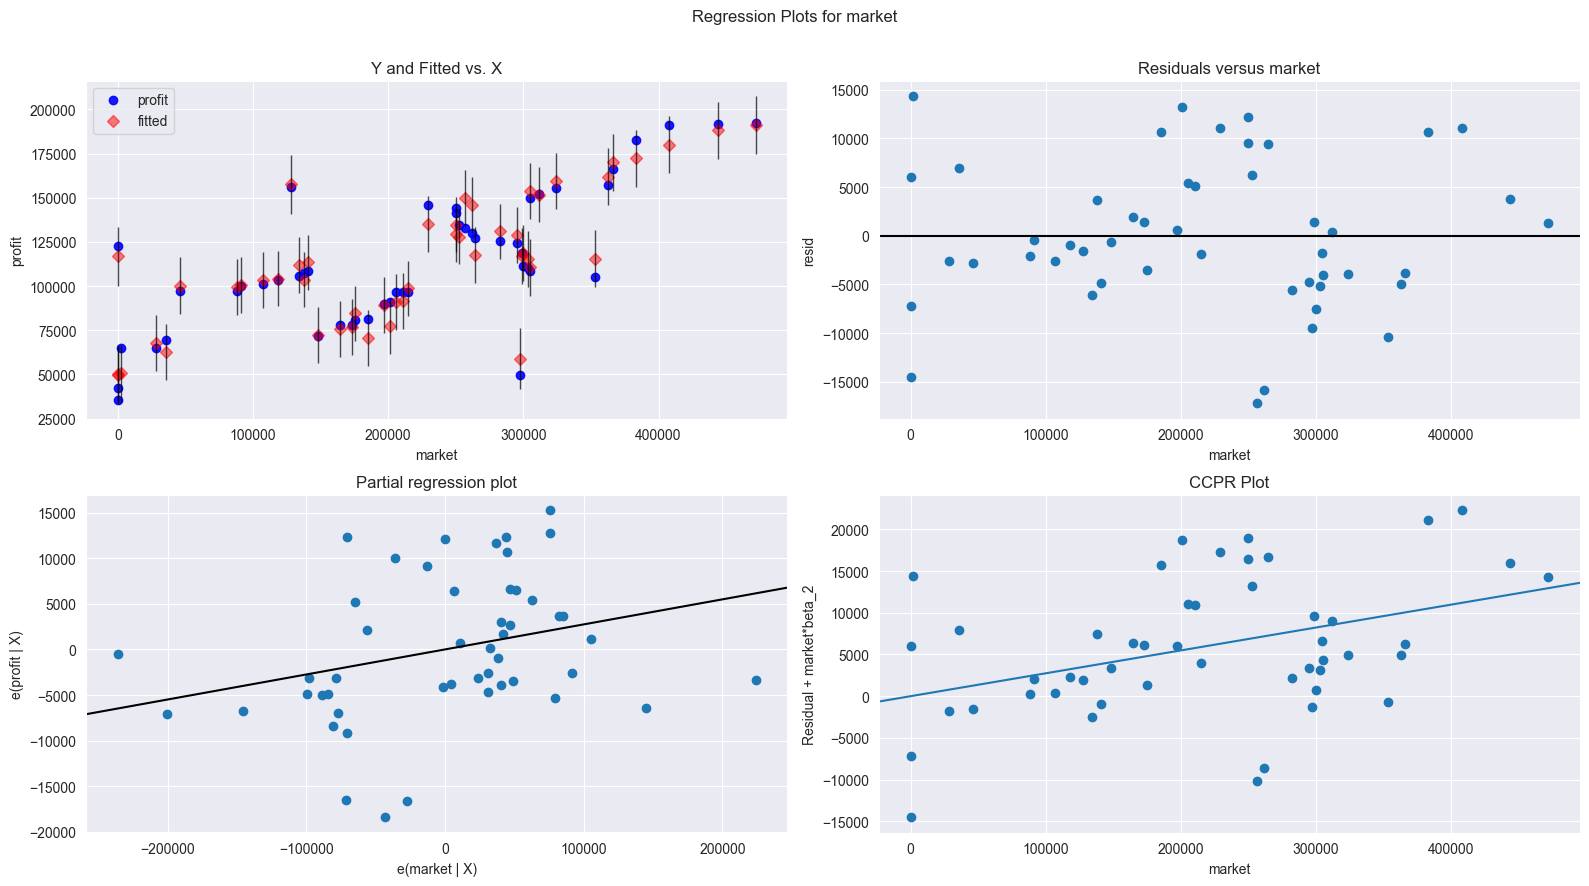

In [50]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(marketing_p_model, 'market', fig=fig)
plt.show()

#### Observation:
1) All our Assumptions are satisfied by the above model.

2) It is satisfied by the model using Marketing feature.

3) While building a model using Marketing we got better results better AIC, BIC, R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics score by comparing it with the model in which Adminstration feature was used.

### Let's compare the residuals of both the models to come up with an conclusion
## Model Validation
#### Comparing different models with respect to their Root Mean Squared Errors
We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) —average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [51]:
print('Adminstration Model=', np.sqrt(admin_p_model.mse_resid),'\n''Marketing Model=', np.sqrt(marketing_p_model.mse_resid))


Adminstration Model= 7947.922013017299 
Marketing Model= 7691.884748549172


#### As we see there is the minmium rmse value is "MArketing Model"

#### So we conclude that ,The Model that was build without using Administration feature performed very well.
Scoring minimumn Root mean squared error and maximum R-squared and adjusted R-squared.
##### Now, We are going to rebuild the model by dropping the Administration feature.

In [52]:
final_model = smf.ols('profit~RnD+market', data=df2).fit()
final_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           3.74e-33
Time:                        23:43:35   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RnD            0.7754      0.035     22.136      0.000       0.705       0.846
market         0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Residual Analysis(Test for Normality of Residuals (Q-Q Plot))
#### Residuals values  = y - yhat


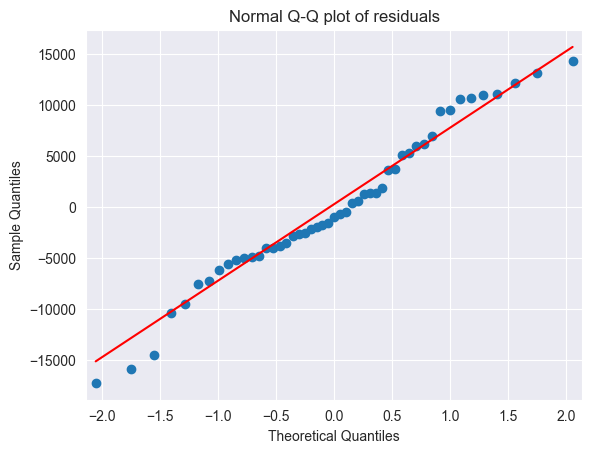

In [53]:
sm.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

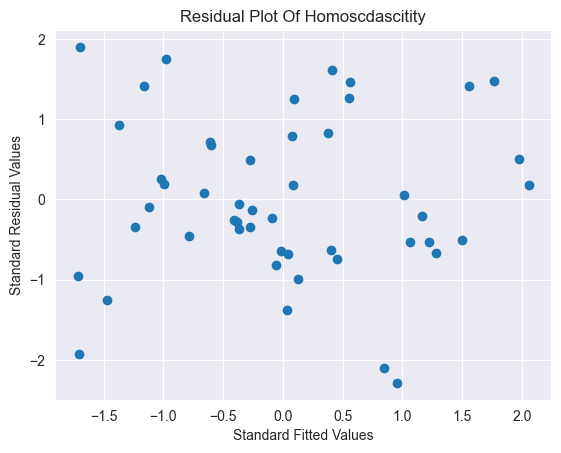

In [54]:
# Residual Plot for Homoscedasticity

def get_standard_values(values):
    return (values - values.mean())/values.std()


plt.scatter(get_standard_values(final_model.fittedvalues), get_standard_values(final_model.resid))
plt.title('Residual Plot Of Homoscdascitity')
plt.xlabel('Standard Fitted Values')
plt.ylabel('Standard Residual Values')
plt.show()

#### Constant Variance (Homoscedasticity) in Error in above graph

Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors


eval_env: 1


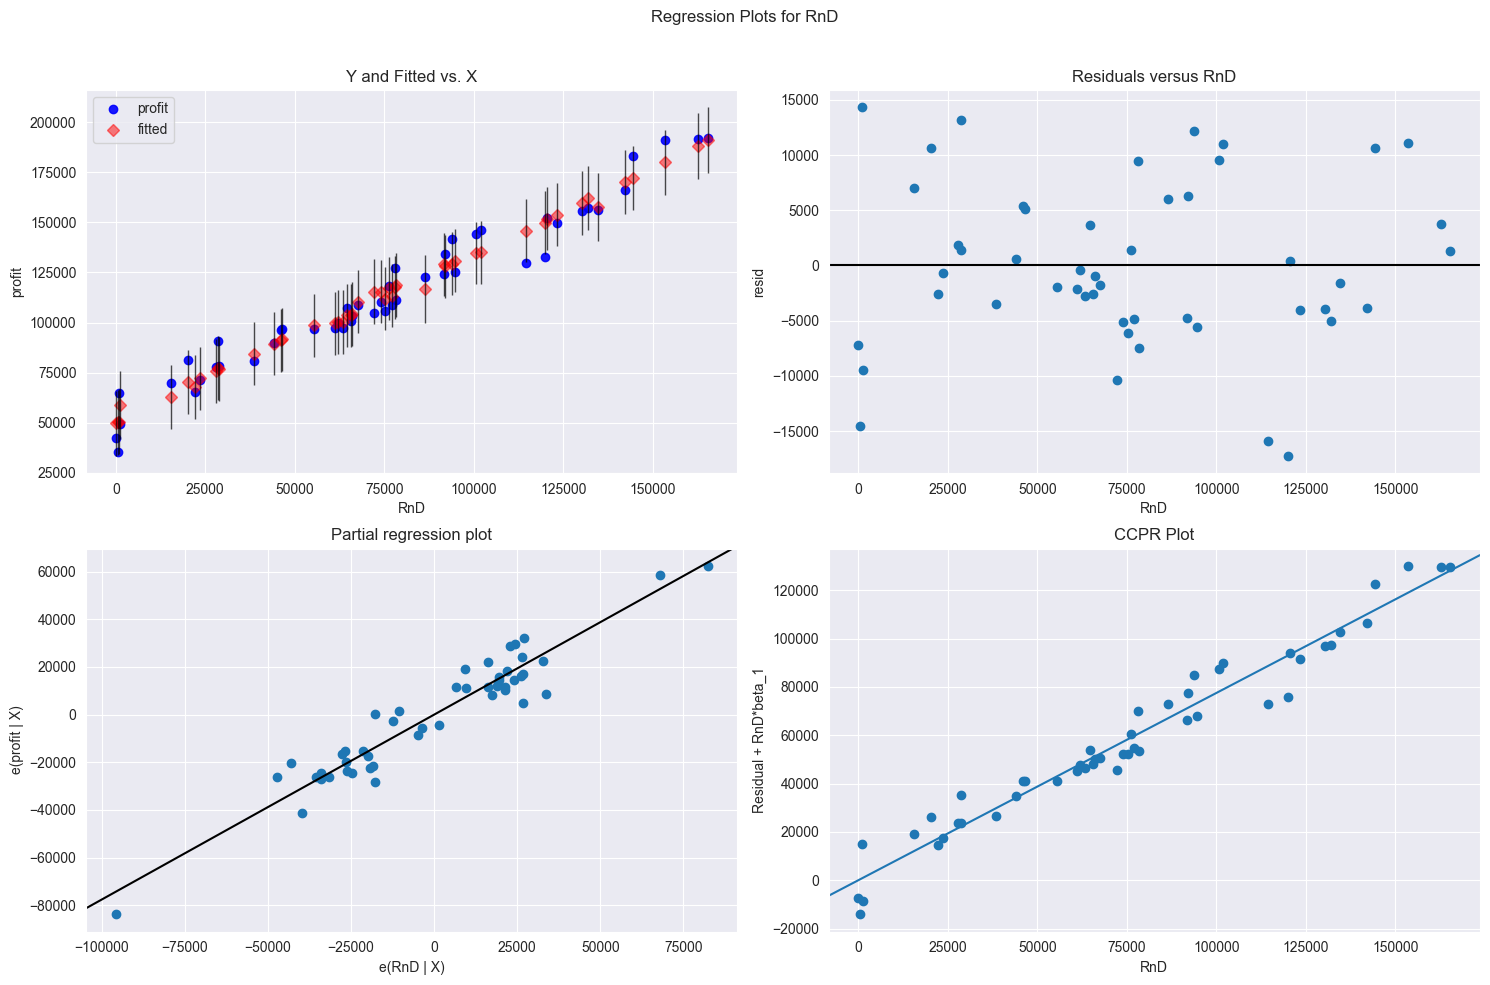

In [55]:
fig = plt.figure(figsize = (15,10))
plot_RnD = sm.graphics.plot_regress_exog(final_model, 'RnD', fig=fig)
plt.show()

eval_env: 1


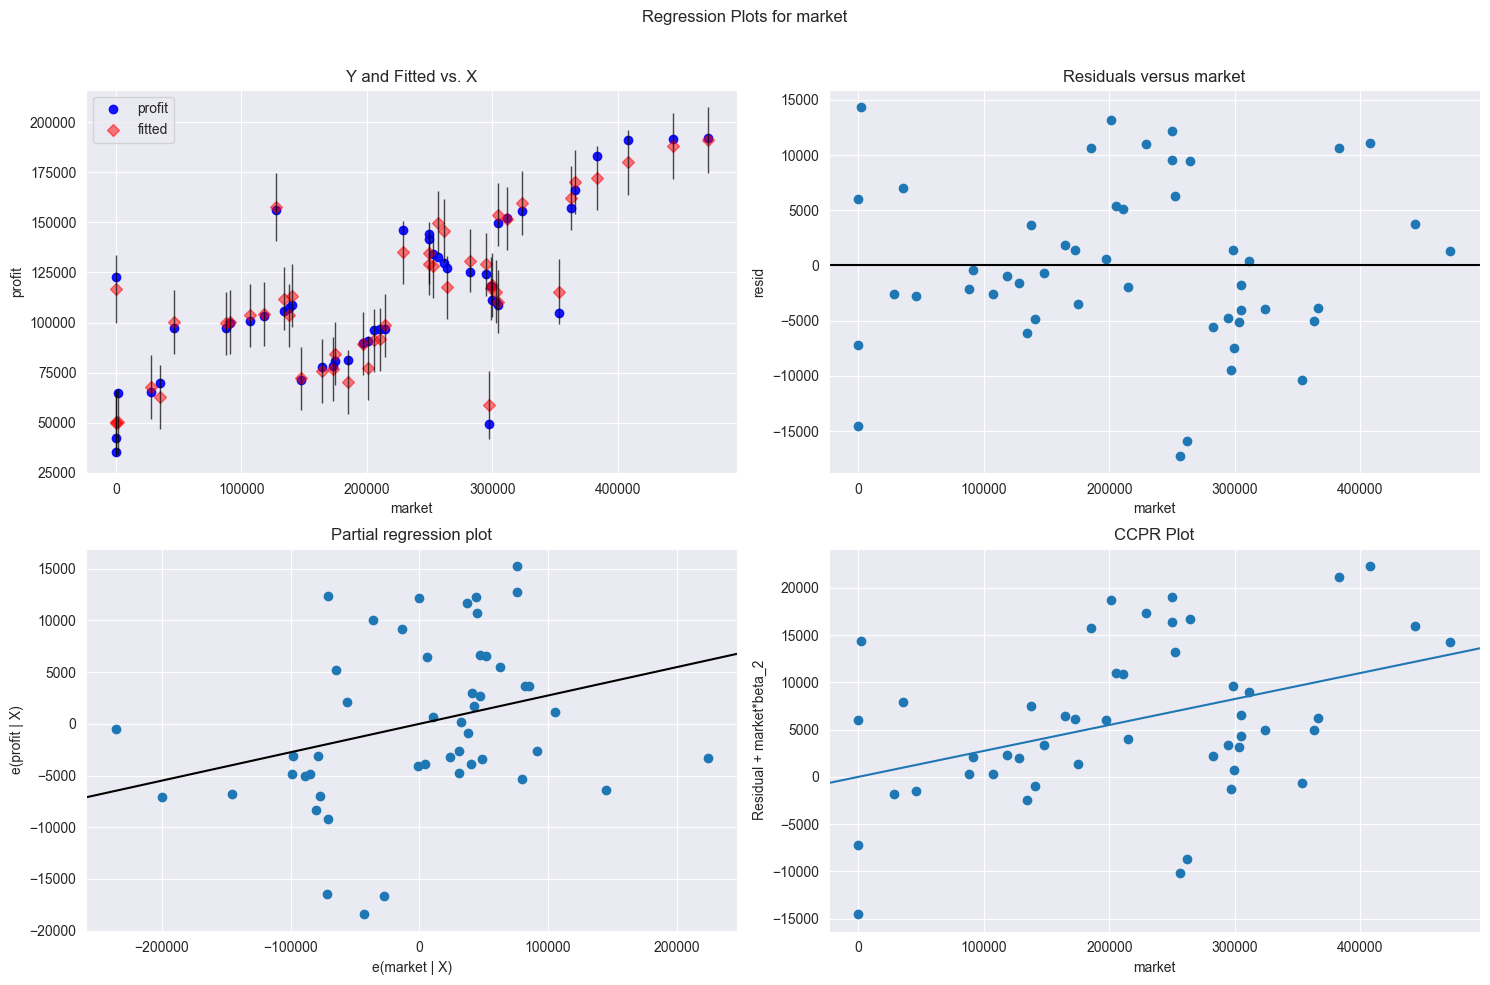

In [56]:
fig = plt.figure(figsize = (15,10))
plot_RnD = sm.graphics.plot_regress_exog(final_model, 'market', fig=fig)
plt.show()

#### Observation:
Each Feature and Model Error (residuals) should be independent of each other
There should be a linear relation between the dependent variable and Independent variables


### Detecting Influencers/Outliers in the final Model
#### By using Cook's Distance


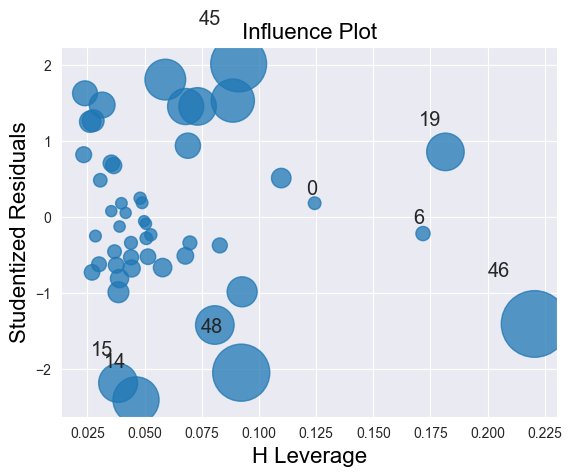

In [57]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

influence_plot(final_model)
plt.show()


Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints


In [58]:
k=df2.shape[1]
n=df2.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.37


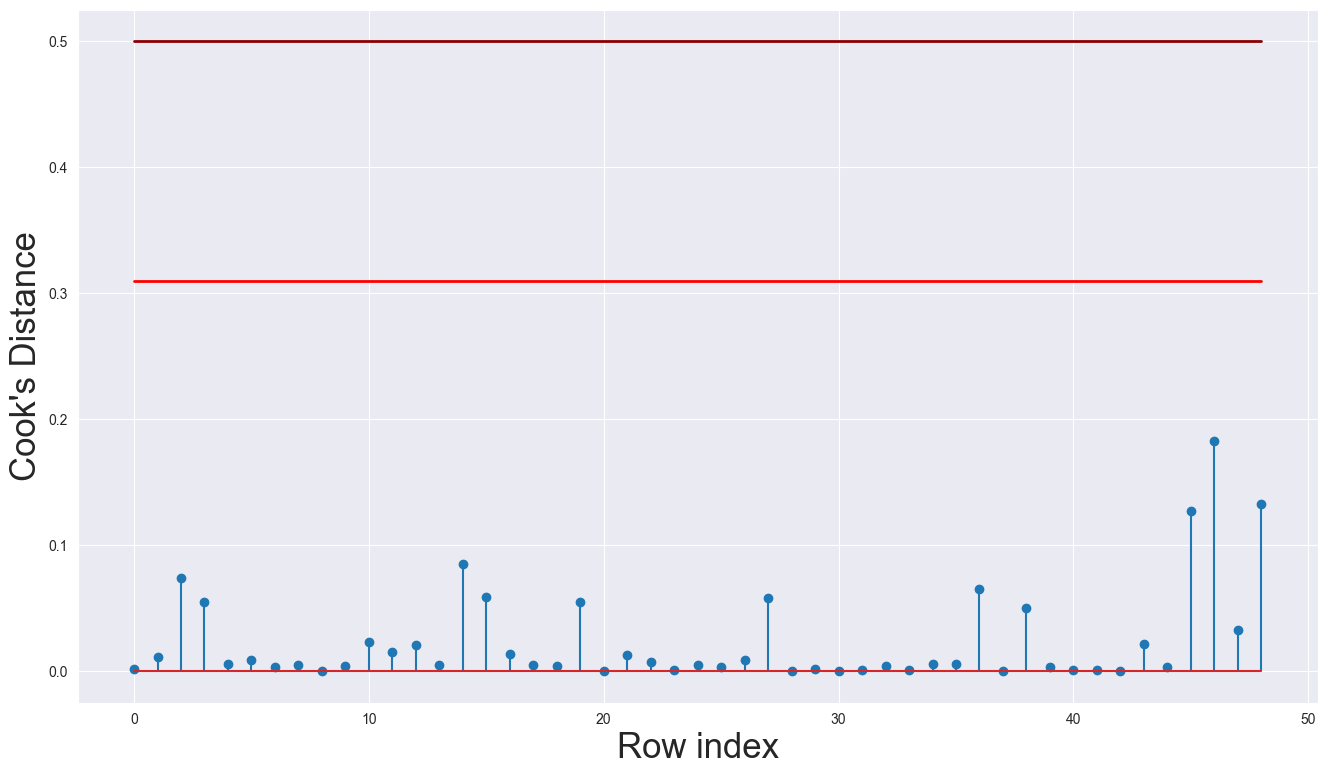

In [59]:
# Let's plot the influencers and also plot a cut off line using the stem plot
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.31,0.31]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(df2)), np.round(c, 3))
plt.xlabel('Row index',fontsize=25)
plt.ylabel("Cook's Distance",fontsize=25)
plt.show()

##### All the points are below our cut-off line
Hence, we can say that there are no influncers present in our model we can proceed with the predictions.

In [60]:
### Predicting values from final Model using same dataset.


In [61]:
predict = pd.DataFrame()
predict['RnD'] = df2.RnD
predict['market'] = df2.market
predict['Profit'] = df2.profit
predict['Predicted_Profit'] = pd.DataFrame(final_model.predict(predict[['RnD','market']]))
predict

,RnD,market,Profit,Predicted_Profit
0,165349.20,471784.10,192261.83,190942.726927
1,162597.70,443898.53,191792.06,188043.924520
2,153441.51,407934.54,191050.39,179957.312472
3,144372.41,383199.62,182901.99,172246.416164
4,142107.34,366168.42,166187.94,170022.687457
5,131876.90,362861.36,156991.12,161999.405410
6,134615.46,127716.82,156122.51,157669.178690
7,130298.13,323876.68,155752.60,159705.298181
8,120542.52,311613.29,152211.77,151804.380605
9,123334.88,304981.62,149759.96,153787.521922


In [62]:
# New data for prediction is
new_data=pd.DataFrame({'RnD':0.0,"market":45103.06},index=[0])
new_data

,RnD,market
0,0.0,45103.06


In [63]:
new_data['predited_profit']=final_model.predict(new_data)
new_data

,RnD,market,predited_profit
0,0.0,45103.06,51023.146356
